In [59]:
from qiskit import *
import numpy as np
from numpy import linalg as la
from qiskit.tools.monitor import job_monitor
import qiskit.tools.jupyter
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt
import copy

# Simulation de systèmes quantiques

C'est historiquement la première raison pour laquelle fut imaginé l'ordinateur quantique. Nous allons montré ci-dessous deux cas d'utilisation : l'un est indépendant du temps, et l'autre une évolution temporelle.

## Indépendant du temps

Un cas simple est la différence de niveaux d'énergie entre les niveaux hyperfins d'hydrogène.

![États hyperfins d'hydrogènes](Images/hydro.png)

Ces niveaux sont dû à la différence de spin entre l'électron et le neutron.

Ci-dessous voici la manière de mesurer un observable différent sur un ordinateur quantique ne pouvant en mesurer qu'un (calcul intuitif):

$\langle Z \rangle = \langle q| Z |q \rangle = \langle q|0 \rangle \langle 0|q\rangle - \langle q|1 \rangle \langle 1|q\rangle = |\langle 0|q \rangle|^2-|\langle 1|q \rangle|^2 $

$\langle X \rangle = \langle q| X |q \rangle = \langle q|+ \rangle \langle +|q\rangle + \langle q|- \rangle \langle -|q\rangle = |\langle +|q \rangle|^2 + |\langle -|q \rangle|^2 = H (|\langle 0|q \rangle|^2-|\langle 1|q \rangle|^2) $

$\langle Y \rangle = \langle q| Y |q \rangle = -i \langle q|0 \rangle \langle 1|q\rangle + i \langle q|1 \rangle \langle 0|q\rangle = -i \langle X \rangle = S^\dag H (|\langle 0|q \rangle|^2-|\langle 1|q \rangle|^2) $

In [60]:
qc = QuantumCircuit(1)

# initialisation d'un état quelconque
qc.rx( np.random.rand()*np.pi*2, 0)
qc.ry( np.random.rand()*np.pi*2, 0)
qc.rz( np.random.rand()*np.pi*2, 0)

In [61]:
# Mesure de Z
measure_z = QuantumCircuit(1,1)
measure_z.measure(0,0)

# Mesure de X
measure_x = QuantumCircuit(1,1)
measure_x.h(0)
measure_x.measure(0,0)

# Mesure de Y
measure_y = QuantumCircuit(1,1)
measure_y.sdg(0)
measure_y.h(0)
measure_y.measure(0,0)

# Description de l'état par les 3 mesures
shots = 2**14
sim = Aer.get_backend('qasm_simulator')
bloch_vector_measure = []
# on mesure l'amplitude de l'état pour les 3 axes
for measure_circuit in [measure_x, measure_y, measure_z]:
    counts = sim.run(transpile(qc.compose(measure_circuit), sim), shots=shots).result().get_counts()

    # Probabilité de mesurer 0 ou 1
    probs = {}
    for output in ['0','1']:
        if output in counts:
            probs[output] = counts[output]/shots
        else:
            probs[output] = 0
    
    # ajout de l'amplitude de l'état pour l'axe considéré
    bloch_vector_measure.append( probs['0'] -  probs['1'] )

# normalisation du vecteur
bloch_vector = bloch_vector_measure/la.norm(bloch_vector_measure)

print('The bloch sphere coordinates are [{0:4.3f}, {1:4.3f}, {2:4.3f}]'
      .format(*bloch_vector))

The bloch sphere coordinates are [0.319, -0.867, 0.382]


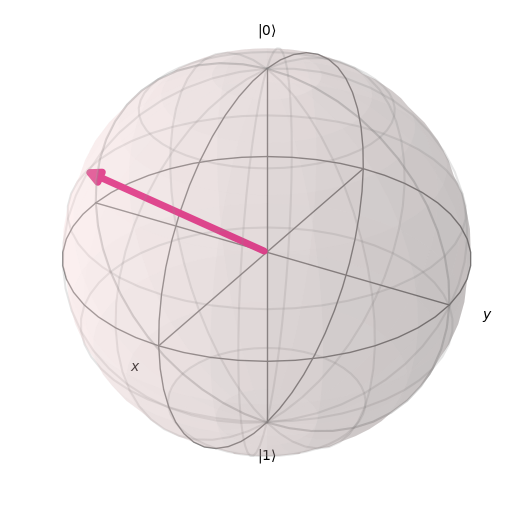

In [62]:
plot_bloch_vector(bloch_vector)

Les observables peuvent aussi être sur plusieurs qubits.

$\langle ZZ \rangle = \langle \psi| ZZ |\psi \rangle = \langle \psi|(|0 \rangle \langle 0| - |1 \rangle \langle 1|) \otimes (|0 \rangle \langle 0| - |1 \rangle \langle 1|)|\psi \rangle = |\langle 00|\psi \rangle|^2-|\langle 01|\psi \rangle|^2-|\langle 10|\psi \rangle|^2+|\langle 11|\psi \rangle|^2 $

$\langle XX \rangle = \langle \psi| XX |\psi \rangle = \langle \psi|H(|0 \rangle \langle 0| - |1 \rangle \langle 1|) \otimes H(|0 \rangle \langle 0| - |1 \rangle \langle 1|)|\psi \rangle = H^{\otimes 2}(|\langle 00|\psi \rangle|^2-|\langle 01|\psi \rangle|^2-|\langle 10|\psi \rangle|^2+|\langle 11|\psi \rangle|^2) $

$\langle YY \rangle = \langle \psi| YY |\psi \rangle = \langle \psi|S^\dag H(|0 \rangle \langle 0| - |1 \rangle \langle 1|) \otimes S^\dag H(|0 \rangle \langle 0| - |1 \rangle \langle 1|)|\psi \rangle = {S^{\dag}}^{\otimes 2} H^{\otimes 2}(|\langle 00|\psi \rangle|^2-|\langle 01|\psi \rangle|^2-|\langle 10|\psi \rangle|^2+|\langle 11|\psi \rangle|^2) $

c:\Python310\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


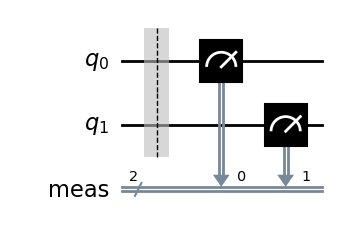

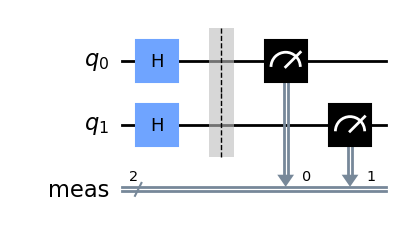

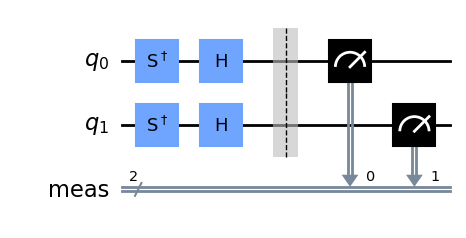

In [63]:
# <ZZ> 
measure_ZZ = QuantumCircuit(2)
measure_ZZ.measure_all()

# <XX>
measure_XX = QuantumCircuit(2)
measure_XX.h([0,1])
measure_XX.measure_all()

# <YY>
measure_YY = QuantumCircuit(2)
measure_YY.sdg([0,1])
measure_YY.h([0,1])
measure_YY.measure_all()

display(measure_ZZ.draw(output='mpl'))
display(measure_XX.draw(output='mpl'))
display(measure_YY.draw(output='mpl'))

Pour simuler l'hydrogène, les spins positif seront 0 et négatif seront 1. Les différents états seront représentés par les états de Bell listés ci-dessous.

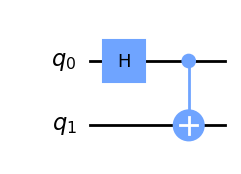

<IPython.core.display.Latex object>

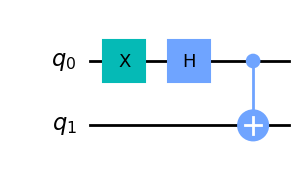

<IPython.core.display.Latex object>

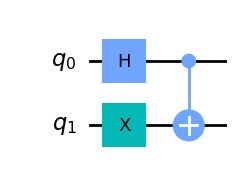

<IPython.core.display.Latex object>

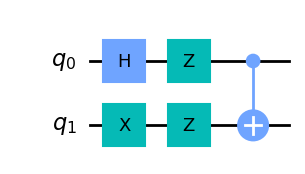

<IPython.core.display.Latex object>

In [64]:
# circuit for the state Tri1
Tri1 = QuantumCircuit(2)
Tri1.h(0)
Tri1.cx(0,1)

display(Tri1.draw(output="mpl"))

state = Aer.get_backend('statevector_simulator')
vec = state.run(transpile(Tri1, state)).result().get_statevector()

display(vec.draw())

# circuit for the state Tri2
Tri2 = QuantumCircuit(2)
Tri2.x(0)
Tri2.h(0)
Tri2.cx(0,1)

display(Tri2.draw(output="mpl"))

state = Aer.get_backend('statevector_simulator')
vec = state.run(transpile(Tri2, state)).result().get_statevector()

display(vec.draw())

# circuit for the state Tri3
Tri3 = QuantumCircuit(2)
Tri3.x(1)
Tri3.h(0)
Tri3.cx(0,1)

display(Tri3.draw(output="mpl"))

state = Aer.get_backend('statevector_simulator')
vec = state.run(transpile(Tri3, state)).result().get_statevector()

display(vec.draw())

# circuit for the state Sing
Sing = QuantumCircuit(2)
Sing.x(1)
Sing.h(0)
Sing.z(0)
Sing.z(1)
Sing.cx(0,1)

display(Sing.draw(output="mpl"))

state = Aer.get_backend('statevector_simulator')
vec = state.run(transpile(Sing, state)).result().get_statevector()

display(vec.draw())

Ci-dessous, on calcule les niveaux d'énergie pour chaque état en mesurant les différent observable de chaque état de Bell.

In [65]:
shots = 2**16 # number of samples used for statistics

A = 1.47e-6 #unit of A is eV
E_sim = []
for state_init in [Tri1,Tri2,Tri3,Sing]:
    Energy_meas = []
    for measure_circuit in [measure_XX, measure_YY, measure_ZZ]:
    
        # run the circuit with the selected measurement and get the number of samples that output each bit value
        qc = state_init.compose(measure_circuit)
        qc_trans = transpile(qc, sim)
        counts = sim.run(qc_trans, shots=shots).result().get_counts()

        # calculate the probabilities for each computational basis
        probs = {}
        for output in ['00','01', '10', '11']:
            if output in counts:
                probs[output] = counts[output]/shots
            else:
                probs[output] = 0
            
        Energy_meas.append( probs['00'] - probs['01'] - probs['10'] + probs['11'] )
 
    E_sim.append(A * np.sum(np.array(Energy_meas)))

En comparant ces résultats à la théorie, ils correspondent parfaitement.

In [66]:
print("Niveaux d'énergie pour l'état Tri1 : {:.3e} eV".format(E_sim[0]))
print("Niveaux d'énergie pour l'état Tri2 : {:.3e} eV".format(E_sim[1]))
print("Niveaux d'énergie pour l'état Tri3 : {:.3e} eV".format(E_sim[2]))
print("Niveaux d'énergie pour l'état Sing : {:.3e} eV".format(E_sim[3]))

Niveaux d'énergie pour l'état Tri1 : 1.470e-06 eV
Niveaux d'énergie pour l'état Tri2 : 1.470e-06 eV
Niveaux d'énergie pour l'état Tri3 : 1.470e-06 eV
Niveaux d'énergie pour l'état Sing : -4.410e-06 eV


Ces différences d'énergie expliquent par exemple la longueur d'onde de la radiation entre ces niveaux d'énergie par la relation de Planck.

In [67]:
# cst de Planck réduite (eV) et vitesse de la lumière (unité cgs)
hbar, c = 4.1357e-15, 3e10

# différence d'énergie entre les niveaux haut et bas
E_del = abs(E_sim[0] - E_sim[3])

# fréquence de la transition
f = E_del/hbar

# convertion en longueur d'onde
wavelength = c/f

print("La longueur d'onde de la radiation de la transition entre les niveaux hyperfins est : {:.1f} cm".format(wavelength))

La longueur d'onde de la radiation de la transition entre les niveaux hyperfins est : 21.1 cm


## Évolution temporel

Nous pouvons aussi assez simplement simulé l'évolution temporel d'une grille de spin.

In [68]:
a = 1
J = 1
dt = 0.1

N = 3
simulator = Aer.get_backend('qasm_simulator')

L'opérateur d'évolution du hamiltonien 

$$ H = \sum_{(i,j)} J Z_i Z_j - a \sum_i X_i$$

peut être implément via le circuit ci-dessous qui donne donc $U = e^{iHt}$ (cf. https://share.phys.ethz.ch/~alps/cqp.pdf)

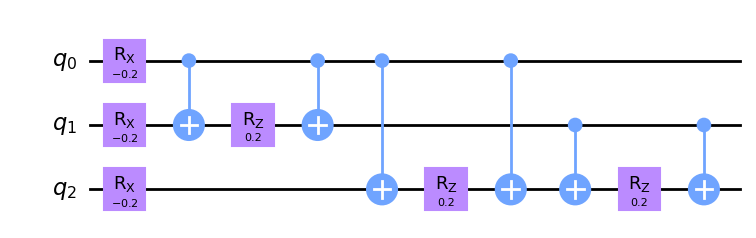

In [69]:
# one dt circuit operation
ope = QuantumCircuit(N)

for i in range(N):
    ope.rx(-2*a*dt, i)

for i in range(N):
    for j in range(i+1, N):
        ope.cx(i, j)
        ope.rz(2*J*dt, j)
        ope.cx(i, j)

ope_gate = ope.to_gate(label="U")

ope.draw(output='mpl')

Évolution de $|101\rangle$ sur 30 $\Delta t$ selon l'observable $Z$ avec $\ket{1}$ correspondant au spin positif ($\ket{0}$ est donc négatif).

In [70]:
def ising(iter):
    test = QuantumCircuit(N)

    test.x(0)
    test.x(2)

    for i in range(iter):
        test.append(ope_gate, range(N))

    test.measure_all()

    shots = 1000
    job = execute(test, simulator, shots=shots)
    result = job.result()
    counts = result.get_counts(test)

    ones = [0 for i in range(N)]
    for k in counts.keys():
        for i in range(len(k)):
            if k[i] == '1':
                ones[i] += counts[k]

    ones = [2*ones[i]/shots-1 for i in range(N)]
    return ones

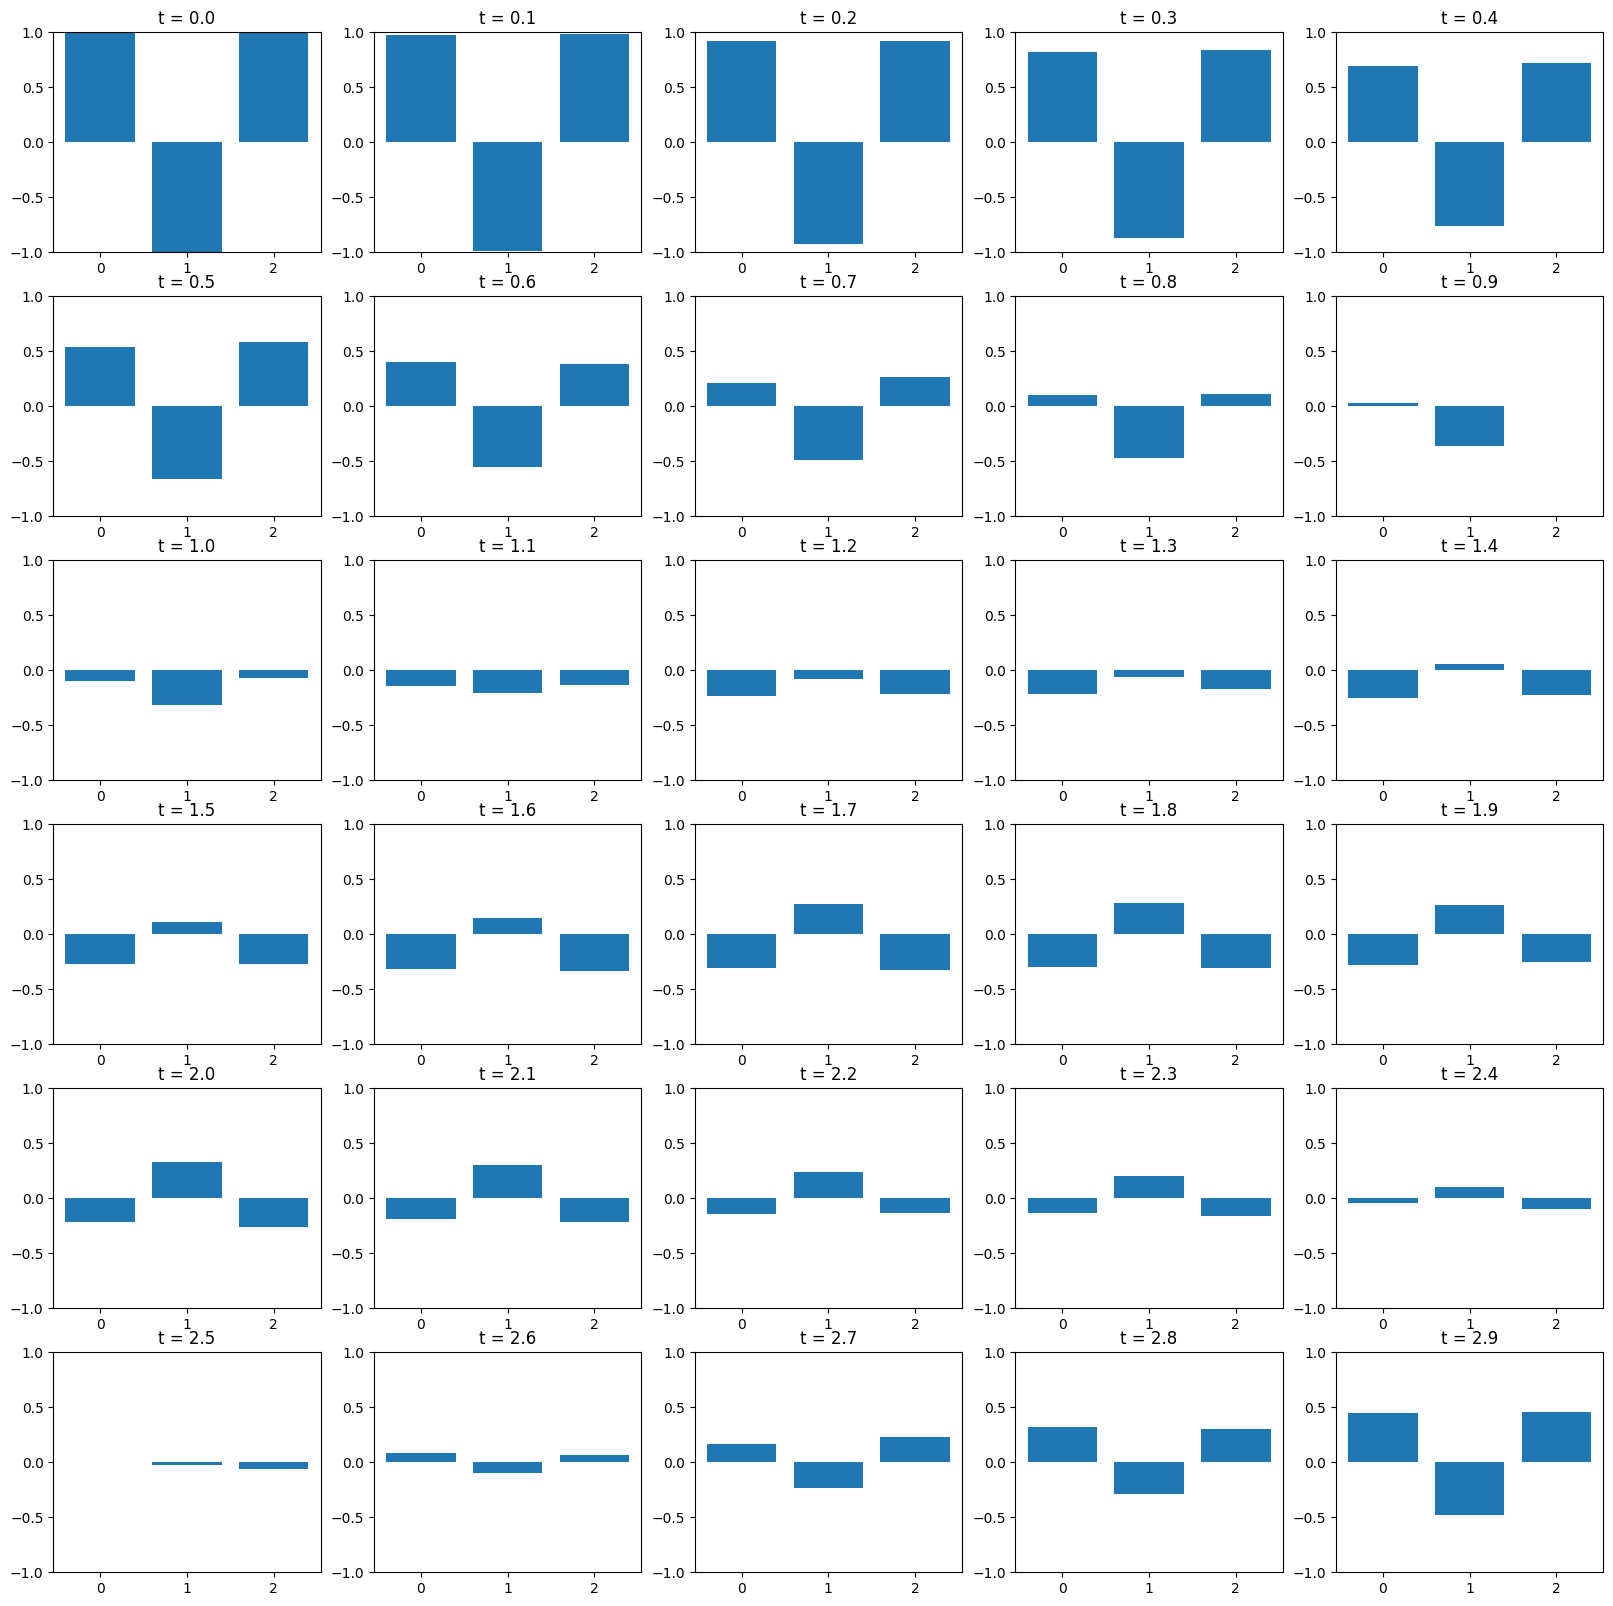

In [71]:
steps = 30
evolve = [ising(i) for i in range(steps)]

plt.figure(figsize=(20, 20))
for i in range(steps):
    plt.subplot(int(steps/5), 5, i+1)
    plt.bar(range(N), evolve[i])
    plt.ylim(-1, 1)
    plt.title('t = ' + str(round(i*dt,1)))
plt.show()

On peut faire une simulation similaire en considérant une grille.

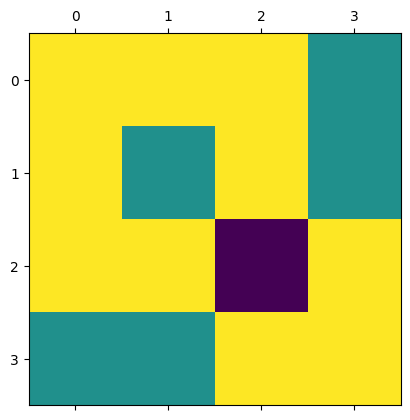

In [72]:
lattice = [[ 1, 1, 1, 0],
           [ 1, 0, 1, 0],
           [ 1, 1,-1, 1],
           [ 0, 0, 1, 1]]

plt.matshow(lattice)

In [73]:
def count_qubits(grid):
    count = 0
    c_sub = []
    for i in range(len(grid)):
        for j in range(len(grid[i])):
            if grid[i][j] != 0:
                count += 1
            else:
                c_sub.append(i*len(grid)+j)
        
    return count, c_sub

In [74]:
n_qubit, corr = count_qubits(lattice)
corr

[3, 5, 7, 12, 13]

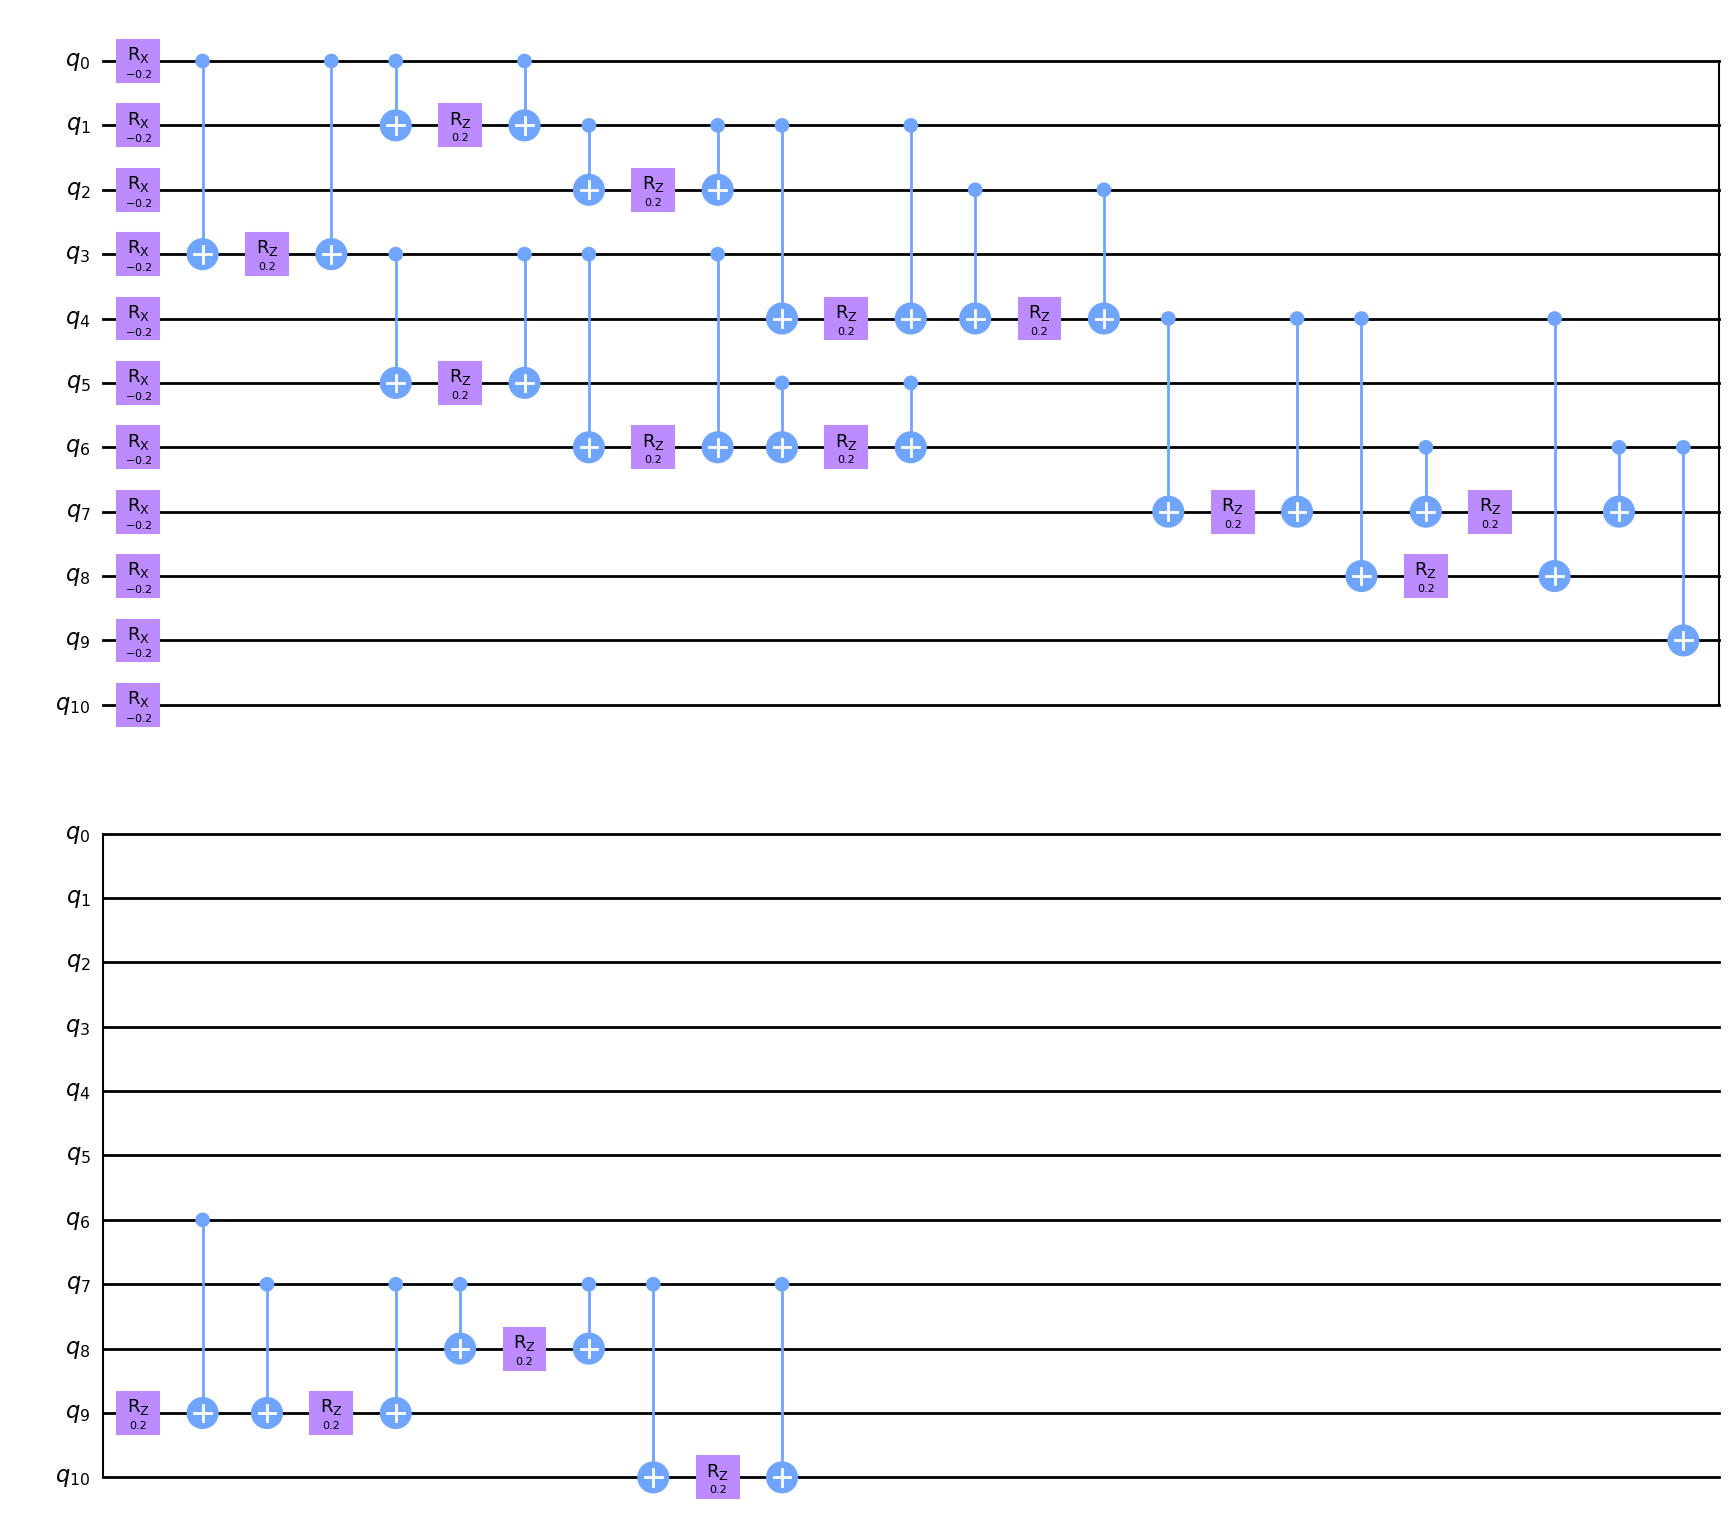

In [75]:
a = 1
J = 1
dt = 0.1

grid_sim = QuantumCircuit(n_qubit)

for i in range(n_qubit):
    grid_sim.rx(-2*a*dt, i)

for i in range(len(lattice)-1):
    for j in range(len(lattice[i])-1):
        if lattice[i][j] != 0:
            if lattice[i+1][j] != 0:
                n1 = i*len(lattice)+j
                d1 = 0
                for k in corr:
                    if n1 > k:
                        d1 += 1
                n1 -= d1
                n2 = (i+1)*len(lattice)+j
                d2 = 0
                for k in corr:
                    if n2 > k:
                        d2 += 1
                n2 -= d2

                grid_sim.cx(n1, n2)
                grid_sim.rz(2*J*dt, n2)
                grid_sim.cx(n1, n2)
            
            if lattice[i][j+1] != 0:
                n1 = i*len(lattice)+j
                d1 = 0
                for k in corr:
                    if n1 > k:
                        d1 += 1
                n1 -= d1
                n2 = i*len(lattice)+(j+1)
                d2 = 0
                for k in corr:
                    if n2 > k:
                        d2 += 1
                n2 -= d2

                grid_sim.cx(n1, n2)
                grid_sim.rz(2*J*dt, n2)
                grid_sim.cx(n1, n2)

            if lattice[i+1][j+1] != 0:
                n1 = i*len(lattice)+j
                d1 = 0
                for k in corr:
                    if n1 > k:
                        d1 += 1
                n1 -= d1
                n2 = (i+1)*len(lattice)+(j+1)
                d2 = 0
                for k in corr:
                    if n2 > k:
                        d2 += 1
                n2 -= d2

                grid_sim.cx(n1, n2)
                grid_sim.rz(2*J*dt, n2)
                grid_sim.cx(n1, n2)

grid_sim_gate = grid_sim.to_gate(label="U")
grid_sim.draw(output='mpl')

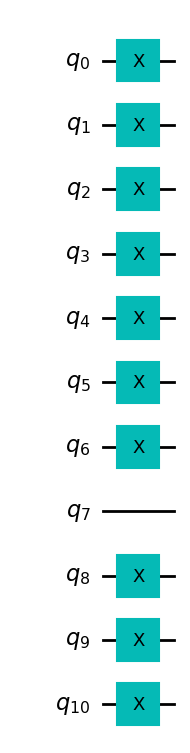

In [76]:
init = QuantumCircuit(n_qubit)

for i in range(len(lattice)):
    for j in range(len(lattice[i])):
        if lattice[i][j] == 1:
            n1 = i*len(lattice)+j
            d1 = 0
            for k in corr:
                if n1 > k:
                    d1 += 1
            n1 -= d1

            init.x(n1)

init_gate = init.to_gate(label="Init")
init.draw(output='mpl')

In [77]:
def grid_fun(iter):
    test = QuantumCircuit(n_qubit)

    test.append(init_gate, range(n_qubit))

    for i in range(iter):
        test.append(grid_sim, range(n_qubit))

    test.measure_all()

    shots = 1000
    job = execute(test, simulator, shots=shots)
    result = job.result()
    counts = result.get_counts(test)

    ones = [0 for i in range(n_qubit)]
    for k in counts.keys():
        for i in range(len(k)):
            if k[i] == '1':
                ones[i] += counts[k]

    ones = [2*ones[i]/shots-1 for i in range(n_qubit)]
    return ones

In [97]:
def grid_plot(res):
    res_2 = copy.deepcopy(res)
    res_2 = res_2[::-1]
    out = copy.deepcopy(lattice)
    ct = 0
    for i in range(len(out)):
        for j in range(len(out[i])):
            if out[i][j] == 0:
                out[i][j] = np.nan
            else:
                out[i][j] = res_2[ct]
                ct += 1

    return out

C:\Users\romai\AppData\Local\Temp\ipykernel_13780\3666898424.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(1, 1))


<Figure size 100x100 with 0 Axes>

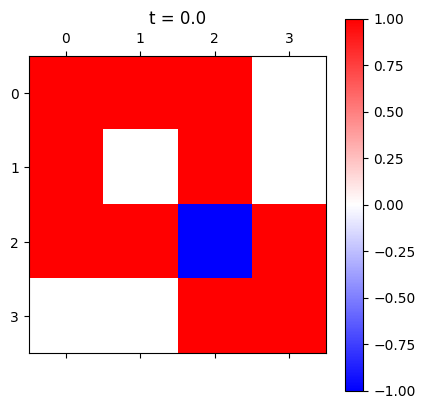

<Figure size 100x100 with 0 Axes>

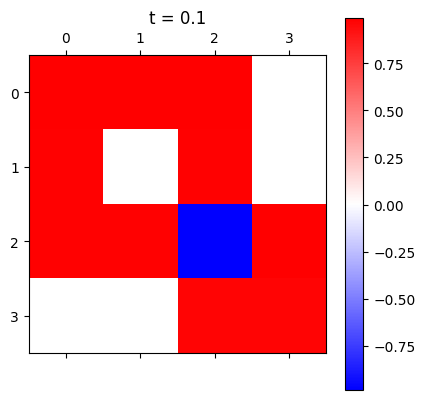

<Figure size 100x100 with 0 Axes>

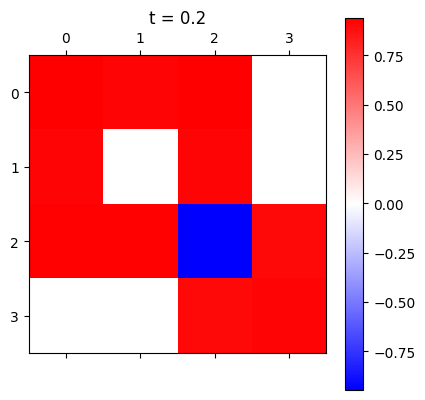

<Figure size 100x100 with 0 Axes>

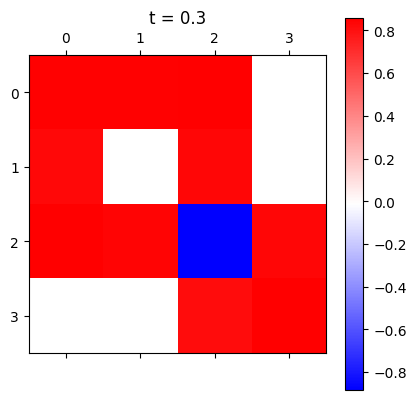

<Figure size 100x100 with 0 Axes>

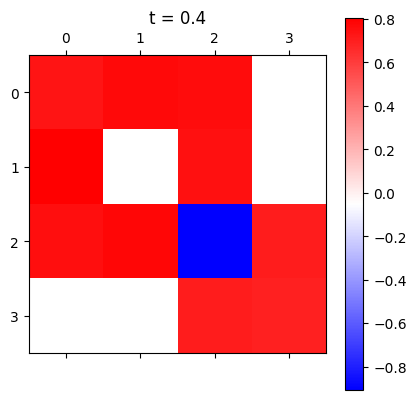

<Figure size 100x100 with 0 Axes>

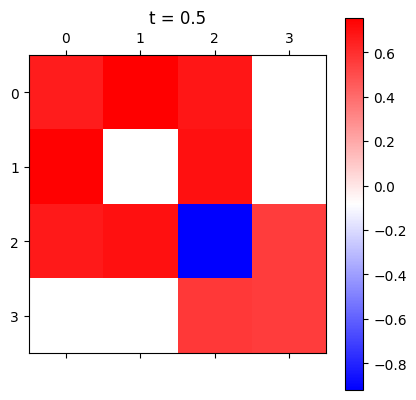

<Figure size 100x100 with 0 Axes>

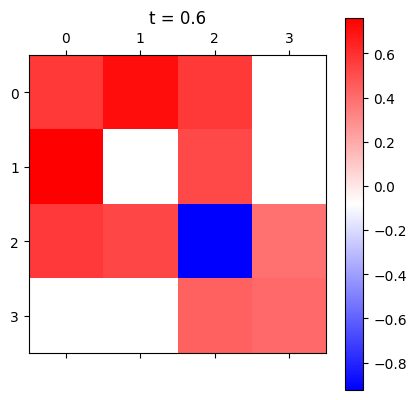

<Figure size 100x100 with 0 Axes>

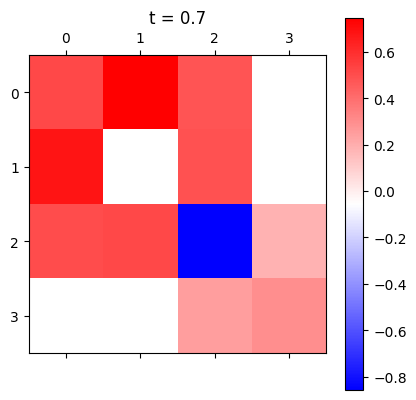

<Figure size 100x100 with 0 Axes>

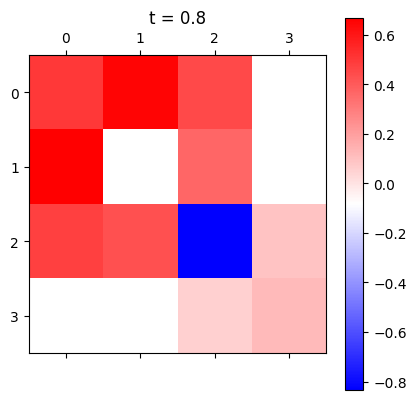

<Figure size 100x100 with 0 Axes>

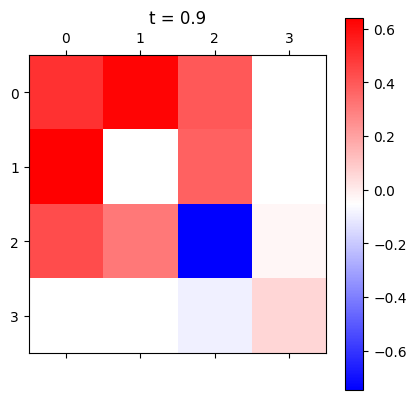

<Figure size 100x100 with 0 Axes>

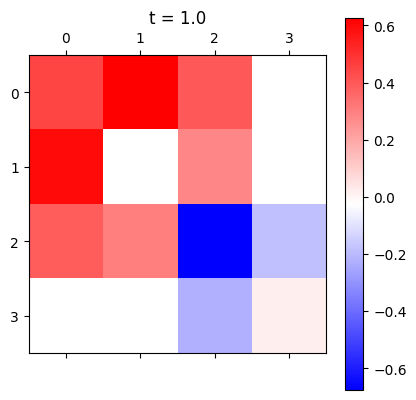

<Figure size 100x100 with 0 Axes>

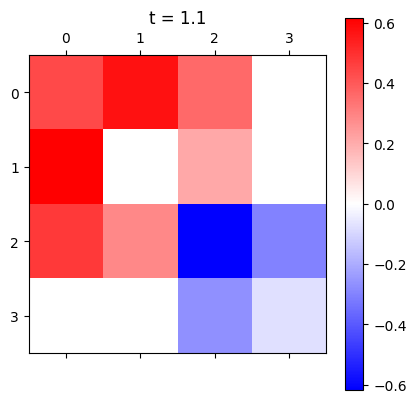

<Figure size 100x100 with 0 Axes>

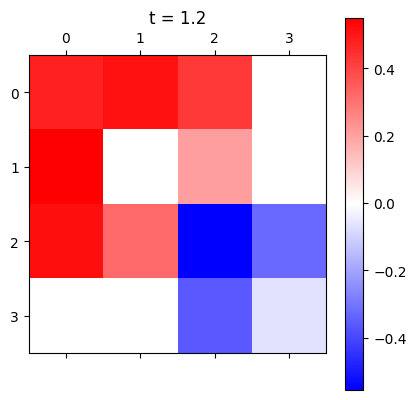

<Figure size 100x100 with 0 Axes>

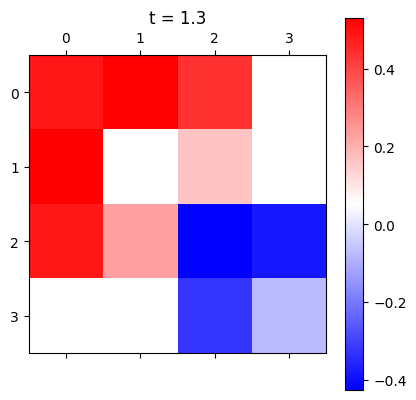

<Figure size 100x100 with 0 Axes>

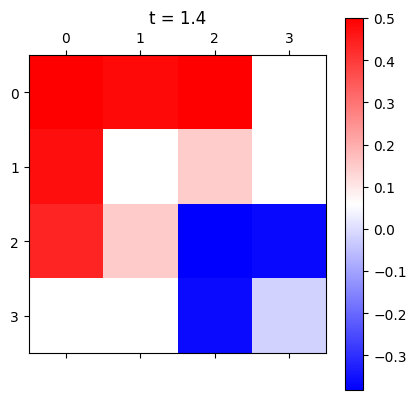

<Figure size 100x100 with 0 Axes>

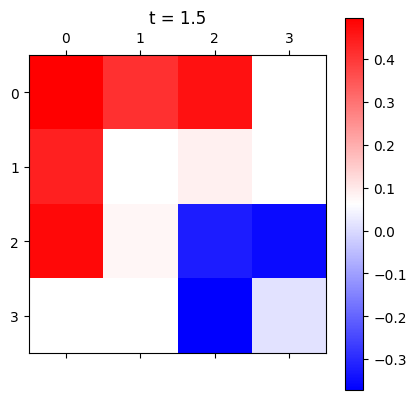

<Figure size 100x100 with 0 Axes>

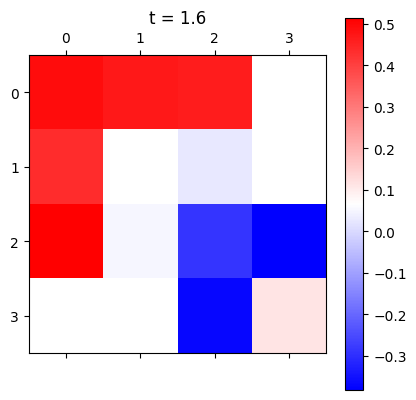

<Figure size 100x100 with 0 Axes>

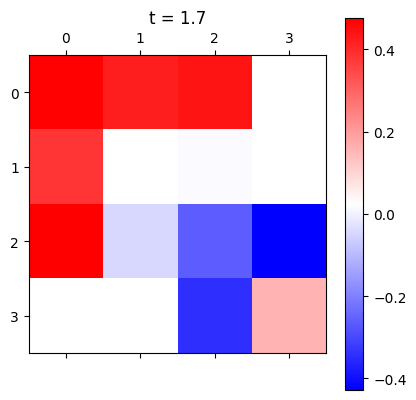

<Figure size 100x100 with 0 Axes>

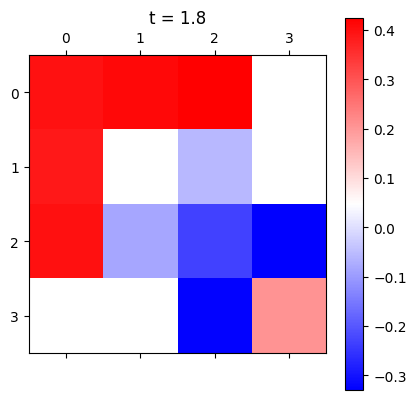

<Figure size 100x100 with 0 Axes>

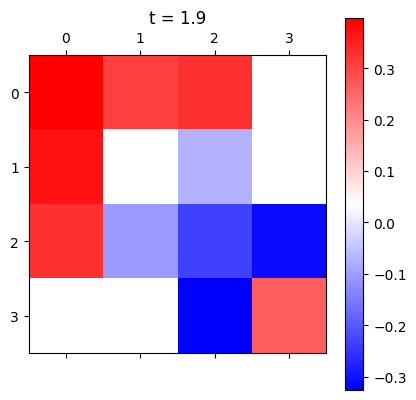

<Figure size 100x100 with 0 Axes>

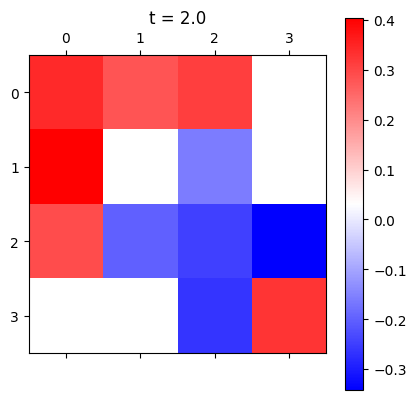

<Figure size 100x100 with 0 Axes>

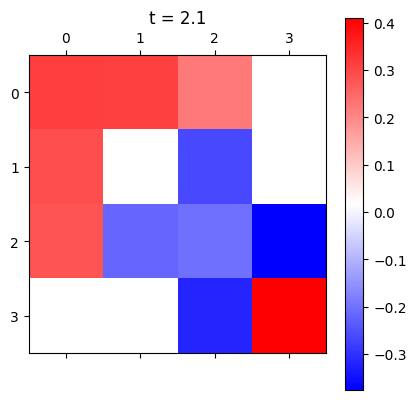

<Figure size 100x100 with 0 Axes>

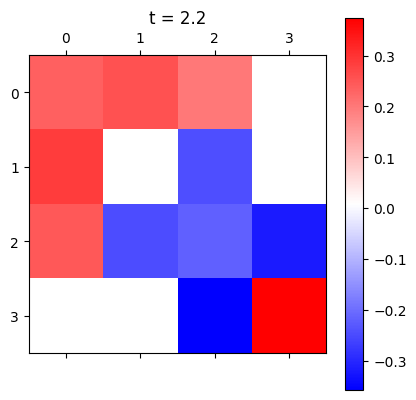

<Figure size 100x100 with 0 Axes>

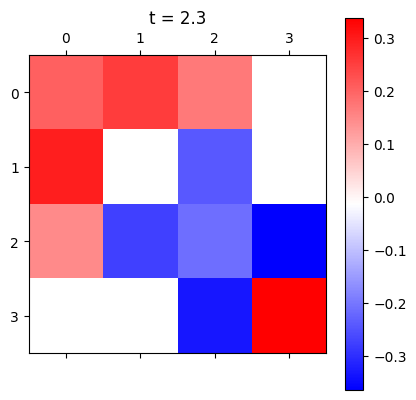

<Figure size 100x100 with 0 Axes>

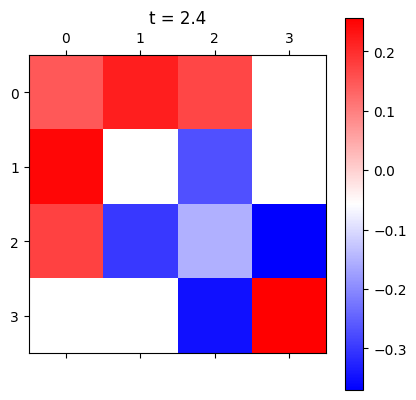

<Figure size 100x100 with 0 Axes>

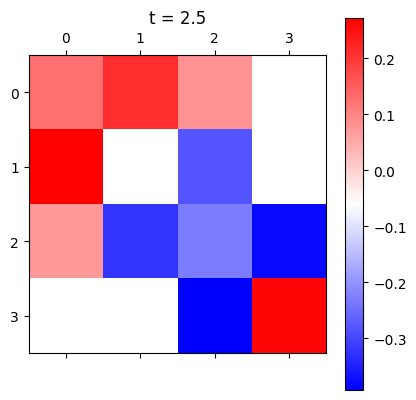

<Figure size 100x100 with 0 Axes>

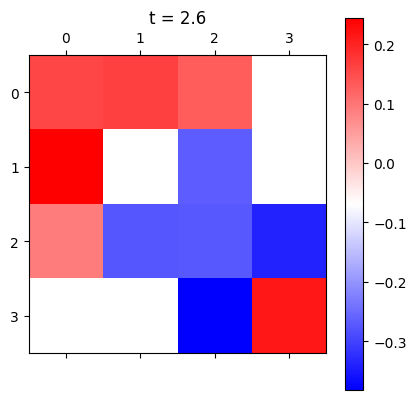

<Figure size 100x100 with 0 Axes>

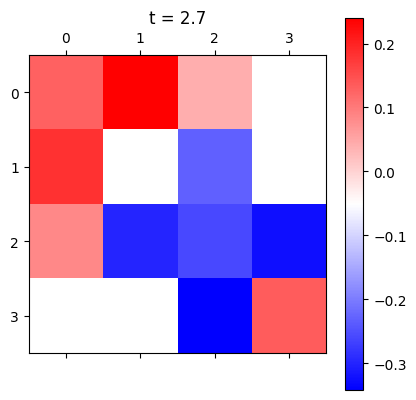

<Figure size 100x100 with 0 Axes>

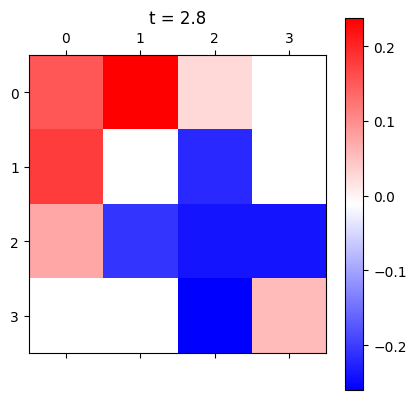

<Figure size 100x100 with 0 Axes>

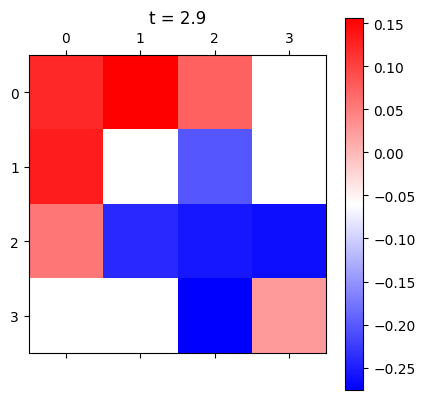

In [111]:
steps = 30
evolve = [grid_fun(i) for i in range(steps)]

for i in range(steps):
    plt.figure(figsize=(1, 1))
    plt.matshow(grid_plot(evolve[i]), cmap='bwr')
    plt.title('t = ' + str(round(i*dt,1)))
    plt.colorbar()